In [2]:
# Import our libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import seaborn as sns


In [3]:
df = pd.read_csv('datasets/Salary_Prediction.csv')
df.shape

(742, 33)

In [4]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0             int64
Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of      Unnamed: 0                                          Job Title  \
0             0                                     Data Scientist   
1             1                          Healthcare Data Scientist   
2             2                                     Data Scientist   
3             3                                     Data Scientist   
4             4                                     Data Scientist   
..          ...                                                ...   
737         737           Sr Scientist, Immuno-Oncology - Oncology   
738         738                               Senior Data Engineer   
739         739  Project Scientist - Auton Lab, Robotics Institute   
740         740                               Data Science Manager   
741         741          Research Scientist – Security and Privacy   

                 Salary Estimate  \
0     $53K-$91K (Glassdoor est.)   
1    $63K-$112K (Glassdoor est.)   
2     $80K-$90K (Gl

In [7]:
df.info(show_counts=True)
#show_counts=True hows number of non-null rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         742 non-null    int64  
 1   Job Title          742 non-null    object 
 2   Salary Estimate    742 non-null    object 
 3   Job Description    742 non-null    object 
 4   Rating             742 non-null    float64
 5   Company Name       742 non-null    object 
 6   Location           742 non-null    object 
 7   Headquarters       742 non-null    object 
 8   Size               742 non-null    object 
 9   Founded            742 non-null    int64  
 10  Type of ownership  742 non-null    object 
 11  Industry           742 non-null    object 
 12  Sector             742 non-null    object 
 13  Revenue            742 non-null    object 
 14  Competitors        742 non-null    object 
 15  hourly             742 non-null    int64  
 16  employer_provided  742 non

In [8]:
# Displaying a STATISTICAL summary of our data in 5dp 
# (only for columns with numerical values)
pd.options.display.float_format = '{:.5f}'.format
df.describe()
# .describe() is a function in pandas that shows the statistical summary of our dataset

,Unnamed: 0,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000,742.00000
mean,370.50000,3.61887,1837.15499,0.03235,0.02291,74.71968,128.14960,100.62601,0.55795,46.59164,0.52830,0.00270,0.22507,0.23720,0.52291,3869.54582,1.05391
std,214.34124,0.80121,497.18376,0.17703,0.14972,30.98059,45.22032,38.85595,0.49697,53.77882,0.49954,0.05188,0.41791,0.42565,0.49981,1521.49587,1.38424
min,0.00000,-1.00000,-1.00000,0.00000,0.00000,15.00000,16.00000,13.50000,0.00000,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,407.00000,0.00000
25%,185.25000,3.30000,1939.00000,0.00000,0.00000,52.00000,96.00000,73.50000,0.00000,11.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2801.00000,0.00000
50%,370.50000,3.70000,1988.00000,0.00000,0.00000,69.50000,124.00000,97.50000,1.00000,24.00000,1.00000,0.00000,0.00000,0.00000,1.00000,3731.00000,0.00000
75%,555.75000,4.00000,2007.00000,0.00000,0.00000,91.00000,155.00000,122.50000,1.00000,59.00000,1.00000,0.00000,0.00000,0.00000,1.00000,4740.00000,3.00000
max,741.00000,5.00000,2019.00000,1.00000,1.00000,202.00000,306.00000,254.00000,1.00000,276.00000,1.00000,1.00000,1.00000,1.00000,1.00000,10051.00000,4.00000


In [9]:
df.isnull().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64

In [10]:
print(df.head())

   Unnamed: 0                  Job Title              Salary Estimate  \
0           0             Data Scientist   $53K-$91K (Glassdoor est.)   
1           1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2           2             Data Scientist   $80K-$90K (Glassdoor est.)   
3           3             Data Scientist   $56K-$97K (Glassdoor est.)   
4           4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu... 3.80000   
1  What You Will Do:\n\nI. General Summary\n\nThe... 3.40000   
2  KnowBe4, Inc. is a high growth information sec... 4.80000   
3  *Organization and Job ID**\nJob ID: 310709\n\n... 3.80000   
4  Data Scientist\nAffinity Solutions / Marketing... 2.90000   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.

In [11]:
print(df['Salary Estimate'].dtype)  # Check the data type of the column
print(df['Salary Estimate'].head())  # Inspect the first few rows of the column
print(df['Salary Estimate'].unique())  # Check unique values in the column


object
0     $53K-$91K (Glassdoor est.)
1    $63K-$112K (Glassdoor est.)
2     $80K-$90K (Glassdoor est.)
3     $56K-$97K (Glassdoor est.)
4    $86K-$143K (Glassdoor est.)
Name: Salary Estimate, dtype: object
['$53K-$91K (Glassdoor est.)' '$63K-$112K (Glassdoor est.)'
 '$80K-$90K (Glassdoor est.)' '$56K-$97K (Glassdoor est.)'
 '$86K-$143K (Glassdoor est.)' '$71K-$119K (Glassdoor est.)'
 '$54K-$93K (Glassdoor est.)' '$86K-$142K (Glassdoor est.)'
 '$38K-$84K (Glassdoor est.)' '$120K-$160K (Glassdoor est.)'
 '$126K-$201K (Glassdoor est.)' '$64K-$106K (Glassdoor est.)'
 '$106K-$172K (Glassdoor est.)' '$46K-$85K (Glassdoor est.)'
 '$83K-$144K (Glassdoor est.)' '$102K-$190K (Glassdoor est.)'
 '$67K-$137K (Glassdoor est.)' '$118K-$189K (Glassdoor est.)'
 '$110K-$175K (Glassdoor est.)' '$64K-$111K (Glassdoor est.)'
 '$81K-$130K (Glassdoor est.)' '$73K-$119K (Glassdoor est.)'
 '$86K-$139K (Glassdoor est.)' '$63K-$105K (Glassdoor est.)'
 '$109K-$177K (Glassdoor est.)' '$63K-$110K (Glassdoor est.

In [12]:
df['Salary Estimate Number'] = df['Salary Estimate'].str.split(' ').str[0]
df['Salary Estimate Number']

0       $53K-$91K
1      $63K-$112K
2       $80K-$90K
3       $56K-$97K
4      $86K-$143K
          ...    
737    $58K-$111K
738    $72K-$133K
739     $56K-$91K
740    $95K-$160K
741    $61K-$126K
Name: Salary Estimate Number, Length: 742, dtype: object

In [15]:
def salary_est(x):
    if '-' in x and '$' in x and 'K' in x:
        try:
            ranged = x.replace('$', '').replace('K', '').split('-')
            min_sal = int(ranged[0])
            max_sal = int(ranged[1])
            return min_sal, max_sal
        except ValueError:
            return None, None
    

df[['Min Salary', 'Max Salary']] = df['Salary Estimate Number'].apply(
    lambda x: pd.Series(salary_est(x))
)


df['Average Salary'] = (df["Min Salary"] + df['Max Salary']) // 2

df['Average Salary']


0      72.00000
1      87.00000
2      85.00000
3      76.00000
4     114.00000
         ...   
737    84.00000
738   102.00000
739    73.00000
740   127.00000
741    93.00000
Name: Average Salary, Length: 742, dtype: float64

In [373]:
# def calculate_midpoint(value):
#     try:
#         parts = value.split('-')
#         if len(parts) == 2:
#             return (int(parts[0]) + int(parts[1])) / 2
#         return int(parts[0])  # If no range, return single value
#     except:
#         return np.nan  # Handle invalid cases

# df['Salary Estimate'] = df['Salary Estimate'].apply(calculate_midpoint)


In [16]:
df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'], errors='coerce')


In [17]:
df['Salary Estimate'] = df['Salary Estimate'].fillna(df['Salary Estimate'].mean())  # Replace NaNs with mean salary


In [18]:
print(df['Salary Estimate'].head())
print(df['Salary Estimate'].dtype)  # Should now be 'float64' or 'int64'


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Salary Estimate, dtype: float64
float64


In [19]:
# Example dataset
data = {'Salary Estimate': ['$50,000-$60,000', '70K-80K', '90,000', 'Unknown', None]}
dg = pd.DataFrame(data)

# Convert Salary column to string and clean
dg['Salary Estimate'] = dg['Salary Estimate'].astype(str).str.replace('[^\d\-]', '', regex=True)

# Calculate midpoint for salary ranges
def calculate_midpoint(value):
    try:
        parts = value.split('-')
        if len(parts) == 2:
            return (int(parts[0]) + int(parts[1])) / 2
        return int(parts[0])  # If no range, return single value
    except:
        return np.nan

dg['Salary Estimate'] = dg['Salary Estimate'].apply(calculate_midpoint)

# Handle missing values
dg['Salary Estimate'] = dg['Salary Estimate'].fillna(dg['Salary Estimate'].mean())

print(dg)


   Salary Estimate
0      55000.00000
1         75.00000
2      90000.00000
3      48358.33333
4      48358.33333


<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/k_/d5lc6js96zzcd9j7cn5hkbr00000gn/T/ipykernel_63687/283676544.py:6: SyntaxWarning: invalid escape sequence '\d'
  dg['Salary Estimate'] = dg['Salary Estimate'].astype(str).str.replace('[^\d\-]', '', regex=True)


Job Title
Director II, Data Science - GRM Actuarial                254.00000
Principal Machine Learning Scientist                     232.00000
Director II, Data Science - GRS Predictive Analytics     194.00000
Staff Machine Learning Engineer                          181.00000
Director, Data Science                                   179.00000
                                                            ...   
Research Scientist, Immunology - Cancer Biology                NaN
Scientist – Cancer Discovery, Molecular Assay                  NaN
Senior Operations Data Analyst, Call Center Operations         NaN
Senior Scientist, Cell Pharmacology/Assay Development          NaN
Sr Data Engineer (Sr BI Developer)                             NaN
Name: Average Salary, Length: 264, dtype: float64


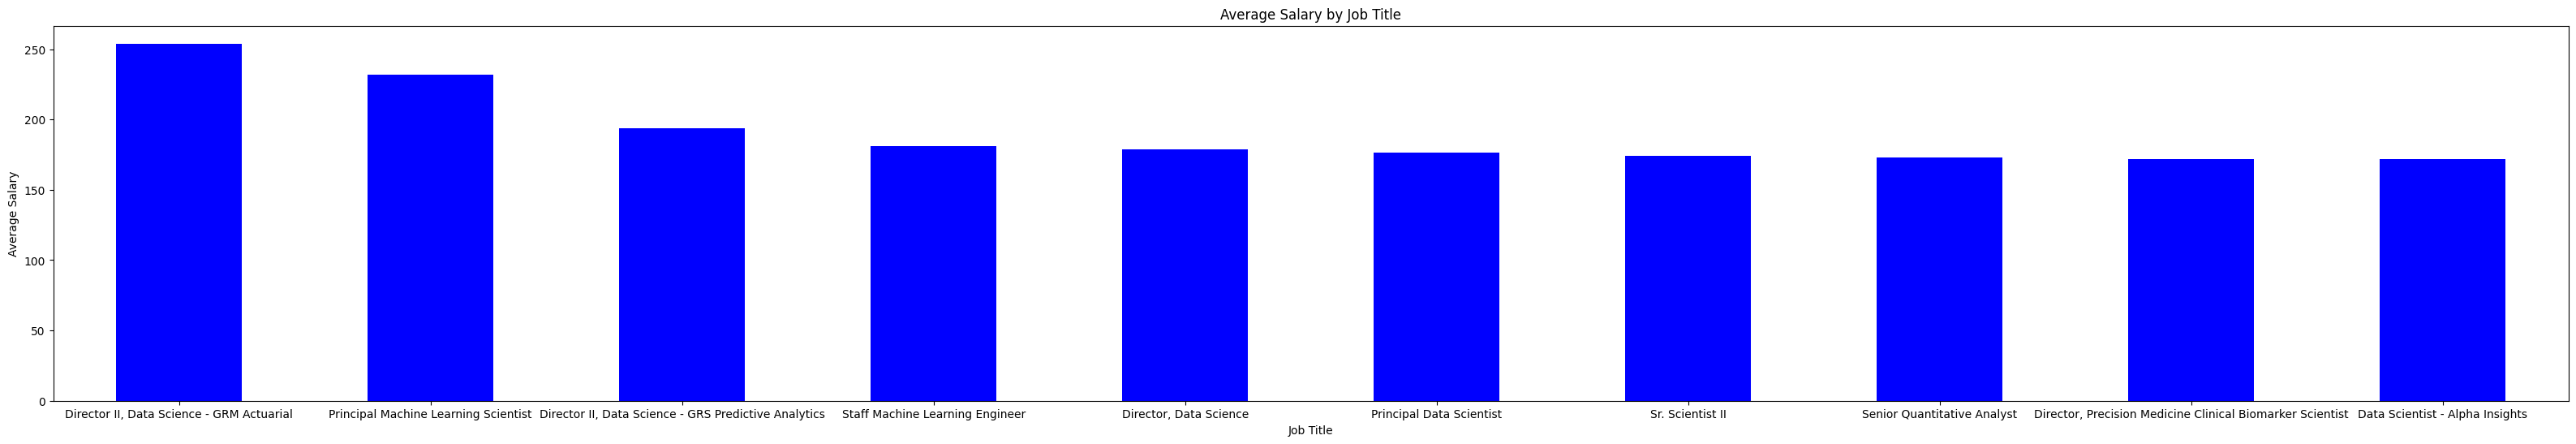

In [20]:
# Grouping salaries by job title and calculate the average salary
job_title_salary = df.groupby('Job Title')['Average Salary'].mean().sort_values(ascending=False)

print(job_title_salary)

plt.figure(figsize=(40,6))
job_title_salary.head(10).plot(kind='bar', color='Blue')
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=0)
plt.show()

In [21]:
print(df.columns)


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'Salary Estimate Number', 'Min Salary', 'Max Salary',
       'Average Salary'],
      dtype='object')


In [22]:
# Convert the first column into the index
df.set_index(df.columns[0], inplace=True) # alternatively, pd.read_csv('datasets/Boston.csv', index_col=0) can be used



# Display the first few rows to verify the changes
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,aws,excel,job_simp,seniority,desc_len,num_comp,Salary Estimate Number,Min Salary,Max Salary,Average Salary
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0,Data Scientist,NaN,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.80000,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,1,data scientist,na,2536,0,$53K-$91K,53.00000,91.00000,72.00000
1,Healthcare Data Scientist,NaN,What You Will Do:\n\nI. General Summary\n\nThe...,3.40000,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,data scientist,na,4783,0,$63K-$112K,63.00000,112.00000,87.00000
2,Data Scientist,NaN,"KnowBe4, Inc. is a high growth information sec...",4.80000,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,data scientist,na,3461,0,$80K-$90K,80.00000,90.00000,85.00000
3,Data Scientist,NaN,*Organization and Job ID**\nJob ID: 310709\n\n...,3.80000,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,data scientist,na,3883,3,$56K-$97K,56.00000,97.00000,76.00000
4,Data Scientist,NaN,Data Scientist\nAffinity Solutions / Marketing...,2.90000,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,1,data scientist,na,2728,3,$86K-$143K,86.00000,143.00000,114.00000


In [23]:
data = df[['Rating', 'aws', 'excel', 'desc_len', 'num_comp', 'Average Salary']]
data.shape

(742, 6)

In [24]:
# Separate the features (x) and the target variable (y)
y = data['Average Salary']
x = data.drop(columns=['Average Salary'])


# Split the dataset into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform it
x_train_scaled = scaler.fit_transform(x_train)
# Transform the test data using the same scaler
x_test_scaled = scaler.transform(x_test)

In [25]:
# 1. LinearRegression() -> this applies mean centering internally to the data 
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

# Visually check the predicted and actual y values ​​of the test data.
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred, s=20, c='r')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# Calculate the R2 score
r2 = model.score(x_test_scaled, y_test)
print('\nR2 (Linear Regression) = {:.3f}'.format(r2))

# 2. Ridge regularization
model = Ridge(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Ridge) = {:.3f}'.format(r2))

# 3. Lasso regularization
model = Lasso(alpha=0.01)
model.fit(x_train_scaled, y_train)
r2 = model.score(x_test_scaled, y_test)
print('R2 (Lasso) = {:.3f}'.format(r2))

ValueError: Input y contains NaN.